In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../lib')
from meep_nb import *

sys.path.append('../../../meep/python/examples/')
from mpb_tri_rods import ms

import meep as mp
from meep import mpb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Run it
ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.004023075103759766
elapsed time for k point: 0.029187917709350586
elapsed time for k point: 0.020277023315429688
elapsed time for k point: 0.017837047576904297
elapsed time for k point: 0.0181

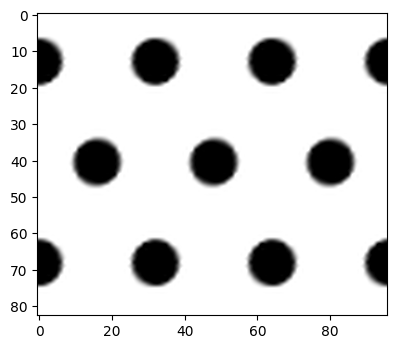

In [3]:
# Visualize index structure
converted_eps = show_geometry(ms)

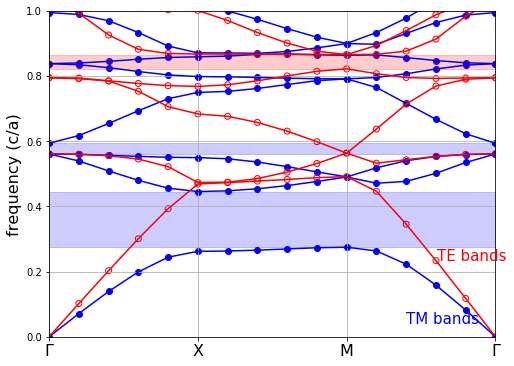

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)